# REGRESSION  MODEL 
=========================================


GOAL: BUILD MACHINE LEARNING MODEL THAT CAN BE USED IN REAL TIME APPLICATION

WHO CAN USE IT: COMPANIES THAT RENT BIKES 

HOW MODEL  CAN BE USED:

To predict demand of bike rental in specific period of time, and company can fit organization,
investmen plans, to be prepared for customer request. 


# 1.Importing dataset and necessary libraris

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('day.csv')

In [3]:
df1.round(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796


# =========================================
Dataset characteristics
=========================================	
Datset day.csv has the following fields:
	
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# 2.Exploratory Data Analyze

In [4]:
def data_information(data):
    print("Data shape  number_rows/number_columns{}".format(data.shape))
    print()
    print("Featurs in data sets are:\n{}".format(data.columns))
    print()
    print("Statistic view on data \n{}".format(data.describe()))
    print()
    print("Head of data set\n{}".format(data.head(5)))
    print()
    print("Tail of data set\n{}".format(data.tail(5)))
    print()
    print("Nan values in data set\n{}".format(data.isnull().sum()))

In [5]:
data_information(df1)

Data shape  number_rows/number_columns(731, 16)

Featurs in data sets are:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Statistic view on data 
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   1

In [6]:
#function numeric_data, takes data_set as argument and returns subset wich is consisted  of numerical values only
def numeric_data(data):
    df_num =data.select_dtypes(include=["int64","float64"])
    return df_num

# df_num is subset of dataset with numeric values,only

In [7]:
numeric_data(df1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [8]:
#Since, further analayze od data_set includes some changes on original dataset, it is nessecery to make a copy of dataset
df=df1.copy()


In [9]:
# copy of original dataset, with all normalized values
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


After analize of dataset, decision is to remove next feature:

1.instant(since it is id number of record)
2.casual and registrated (since sum of those two feature gives valu in  cnt)
3.atemp since this feature higly corelated with temperatue
4.dteday date 

In [10]:
df.drop(['instant','casual','registered','atemp','dteday'],axis=1,inplace=True)

In [11]:
# function corelation matrix(argument is data_set)
def corr_matrix(data):
    df_num=data.select_dtypes(include=["int64","float64"])
    corr_matrix_origin = df_num.corr(method ='pearson')
    list_col_origin = list(df_num.columns)
    plt.figure(figsize = (20,10))
    ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)

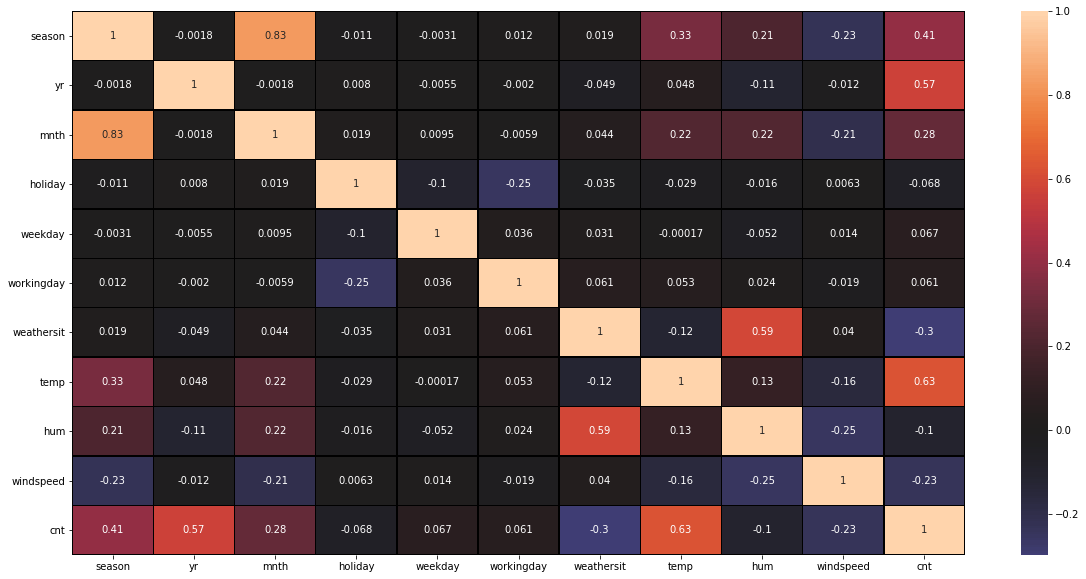

In [12]:
corr_matrix(df)

#corelation matrix represents, that total number of bike rental is highest corelated with next feature:
#1.season,2.year,3.month,4.temperature,5.windspeed

# Conclusion of corelation matrix:
1.Highest correlation is beetween count of bike renting and temperature,season,year,and mont
2.Negative correlation is beetween count of bike renting and holidy,weatersite,and humidity,
wich means that increasing of those feature decerese countvalue


# VISUALIZING DATE

In [13]:
#function numeric_feature_lsit(),takes dataset as argument and returns number of numerical features in dataset
#1.season,2.year,3.month,4.temperature,5.windspeed

def numeric_feature_list(data):
    numeric_list=list(numeric_data(data).columns)
    return numeric_list
print("NUMBER OF NUMERICAL FEATURES IS:",len(numeric_feature_list(df1)))


NUMBER OF NUMERICAL FEATURES IS: 15


In [14]:
# function distribution_histogram(feature_list,n_row,n_col,f_size1,f_size2,data)
#(arguments are list of numeric columns,number of row,number of columns,figuresize_x,figuresize_Y,dataframe )
#functons should plot histograms for all numeric values in dataset, in number matric shape(nrow x ncolm we want)

def distribution_histogram(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.distplot(x,ax=ax)
        except(IndexError):
            pass

# Distribution histogram of features

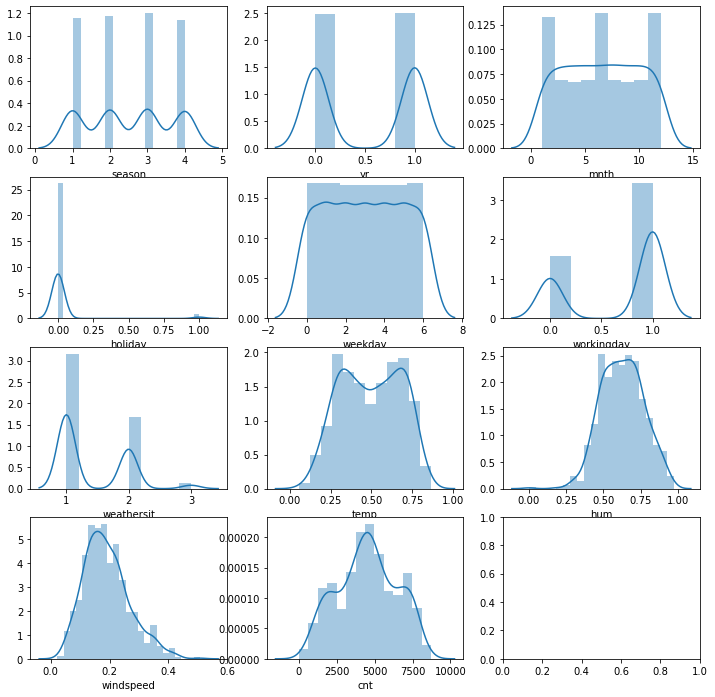

In [15]:
distribution_histogram(numeric_feature_list(df),4,3,12,12,numeric_data(df))

In [16]:
#function distribution_boxplot takes as argument features we want to presents,number of rows,number of columns,figuresize,data.
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.boxplot(x,ax=ax,y=df['cnt'])
        except(IndexError):
            pass

# Distribution boxplots of features

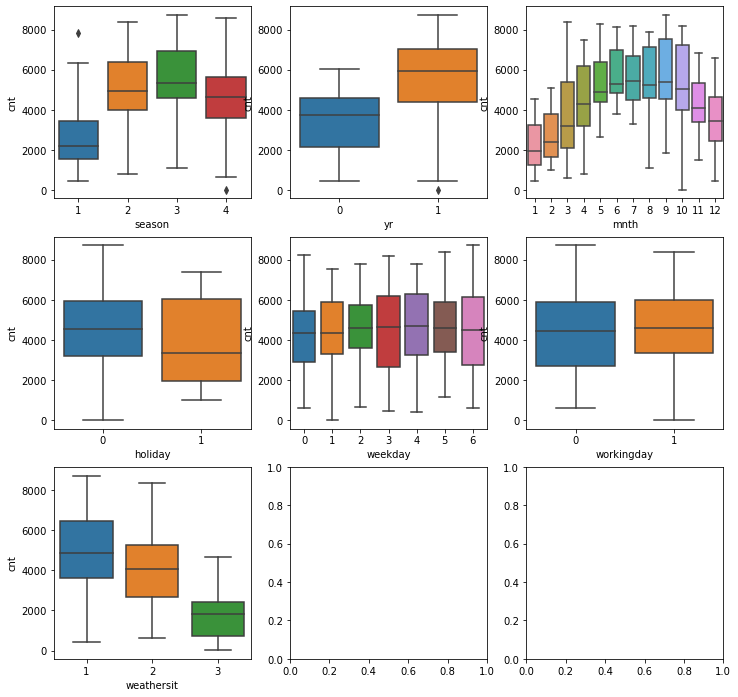

In [17]:
#distribution_boxplot(num_cols,4,3,10,10,df_num)
distribution_boxplot(['season','yr','mnth','holiday','weekday','workingday','weathersit'],3,3,12,12,numeric_data(df))

From boxplot diagram next informations could be seen:
count value -season
a)number of count rent is lowest in  1:spring,and it doesn't go over 4000,mean value is 2000 bike rent,
b)number of count rent in summer and fall increases and in summer mean value is 5000
c)number of count rent in fall is highest and reaches almost 9000,with mean value over 5000
d)number of count rent in winter decrease agin and mean valu is about 5000

count value-year
a)in first year majority of values is between 2000 and 4000
b)in second year majority of values is between 5000 and 7000

count value-month
the highest values of rent numbers are in semptermber and october

count value-holiday
mean value of rent number is higher when it was not holiday

count value-weekday
number of rent is aproximalty same in all days of the week

count value-working day
number of rent doesn't depend on working day

count value-weathersit
rent number depends of weathersit if weather is clear, it incease in 4000 to 6000 bike renting,
if weather is couldy it decerase on values between 3000 and 5000,
if weather is lightsnow it decrease and doesn't go over 2000

# Plot DEPENDANT FEATURE to UNDEPENDANT FEATURS(regulation plot)

In [18]:
#dependant_feature_to_undependant takes number of row,num of culumns,fugure size,dataset,dependant_feature)
def dependant_feature_to_undependant(nrow,ncols,figsize1,figsize2,data_set,dependant_feature):
    list_value=numeric_feature_list(data_set)
    list_value.remove(dependant_feature)
    fig, axs = plt.subplots(nrows =nrow,ncols =ncols, figsize = (figsize1,figsize2))
    for i in range(0, len(list_value)):
        try:
            rows =i//ncols
            cols =i% ncols
            ax = axs[rows,cols]
            plot = sns.regplot(x = list_value[i], y = dependant_feature, data=data_set, ax=ax)
        except:
            pass

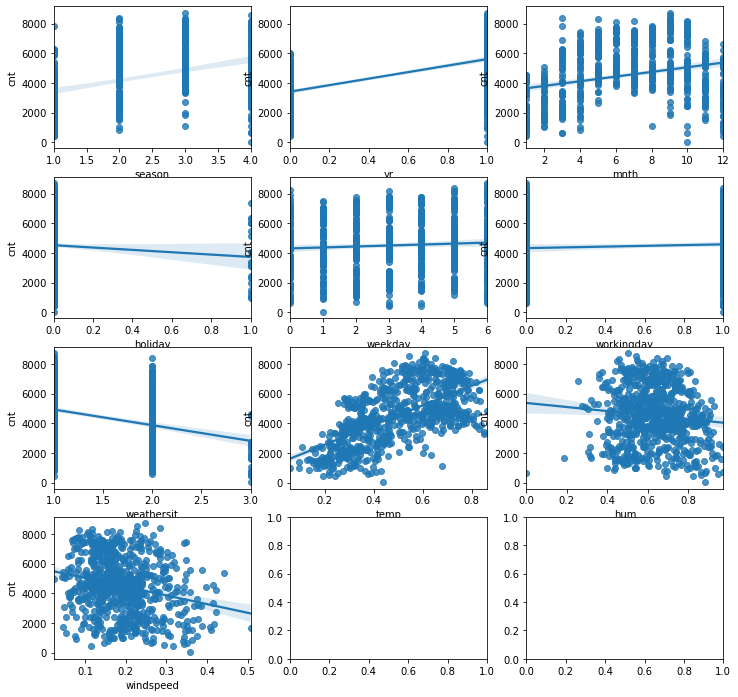

In [19]:
# dependans according to whole dataset
dependant_feature_to_undependant(4,3,12,12,df,"cnt")

# Conclusion of the plot above is:
1.count of bike rent increased in second year of obsevation

2.count of bike rent increases with increase of temperature

3.majority of bike rent happens when humidity is between 0.4 and 0.8 and wind speed is between 0.1 and 0.3


    

# Plots below represents:
1.nubmer of bike rent according to the month and number of bike rent according to the year

Text(0.5, 0, 'month of the year')

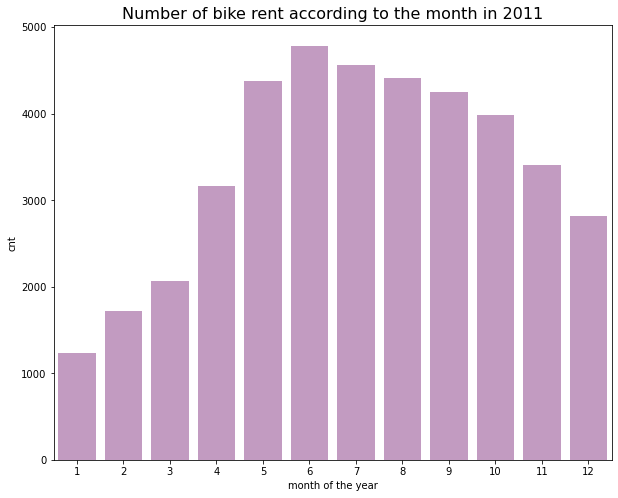

In [20]:
fig = plt.gcf()
fig.set_size_inches(10,8)
ax = sns.barplot(x="mnth", y="cnt", data=df[df['yr']==0], ci=False,color="#c994c7")
ax.set_title("Number of bike rent according to the month in 2011",fontdict={'fontsize':16})
plt.xlabel('month of the year')

Text(0.5, 0, 'month of the year')

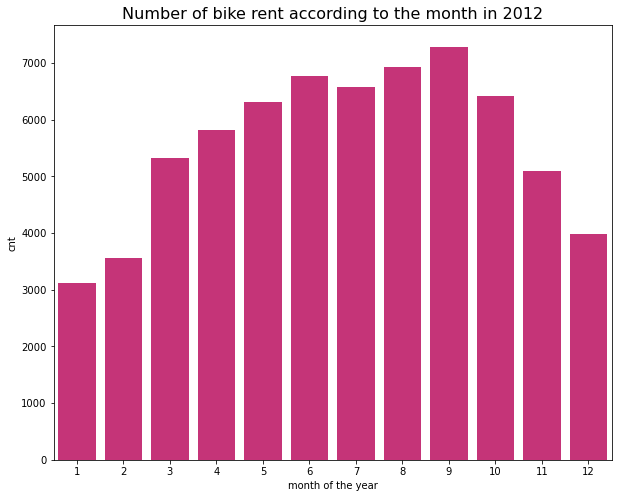

In [21]:
fig = plt.gcf()
fig.set_size_inches(10,8)
ax = sns.barplot(x="mnth", y="cnt", data=df[df['yr']==1], ci=False,color="#dd1c77")
ax.set_title("Number of bike rent according to the month in 2012",fontdict={'fontsize':16})
plt.xlabel('month of the year')

# Conclusion of the plots is: 
In year 2011:
1.count of bike rent is less than 3000/month  in january and february
2.count of bike rent is between 3500/month and 6000/month
In year 2012:
1.count of bike rent is less than 4000/month  in january and february,and december
2.conut of bike rent is between 4000/mont and 7000/mont


# Plots below represents:
Number of bike rent according to the season

Text(0.5, 0, '1:spring   2:summer   3:fall   4:winter')

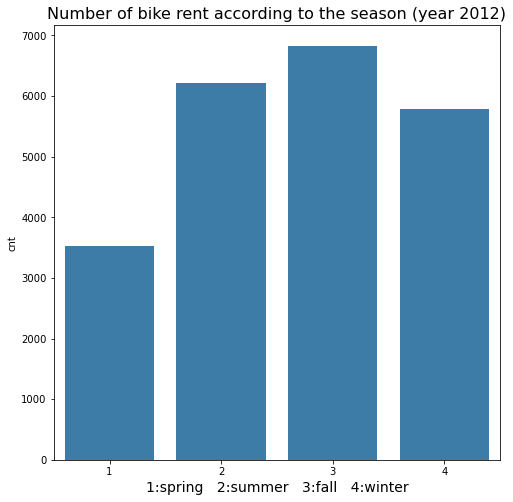

In [22]:
fig = plt.gcf()
fig.set_size_inches(8,8)
ax = sns.barplot(x="season", y="cnt", data=df[df['yr']==1], ci=False,color='#2c7fb8')
ax.set_title("Number of bike rent according to the season (year 2012)",fontdict={'fontsize':16})
plt.xlabel('1:spring   2:summer   3:fall   4:winter',fontdict={'fontsize':14})

# Conclusion of the plot above is:
    
1.count of bike rent is less than 4000/month  in spring

2.count of bike rent is above 5500/month in summer,fall and winter

Text(0.5, 1.0, 'Count of bike renting according to the holiday')

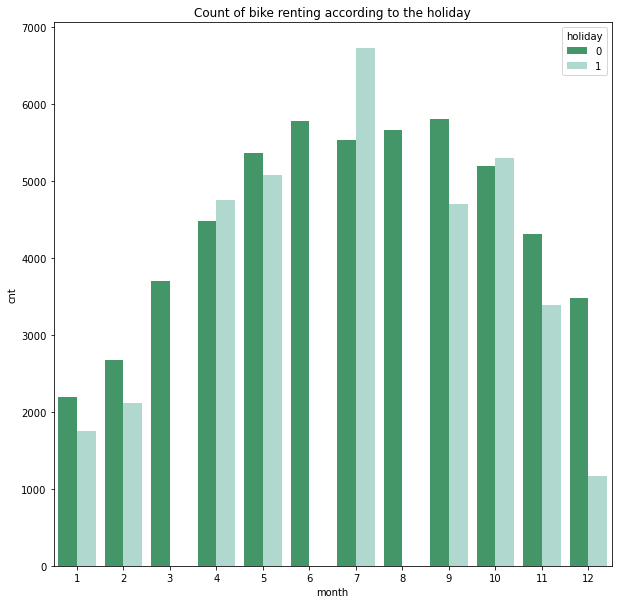

In [23]:
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = sns.barplot(x="mnth", y="cnt", data=df, ci=False, hue = 'holiday',palette="BuGn_r")
plt.xlabel('month')
ax.set_title("Count of bike renting according to the holiday")

Text(0.5, 1.0, 'Count of bike renting in two years (2011 and 2012)')

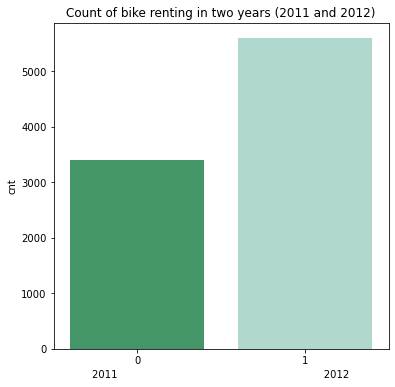

In [24]:
fig = plt.gcf()
fig.set_size_inches(6,6)
ax = sns.barplot(x="yr", y="cnt", data=df, ci=False,palette="BuGn_r")
plt.xlabel('2011                                                                  2012')
ax.set_title("Count of bike renting in two years (2011 and 2012)")

conclusion:count of bike renting incease in second year, and increase is significant

In [25]:
def count_plot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.barplot(x, y , color='#7fcdbb',data = data,ax=ax)
        except(IndexError):
            pass

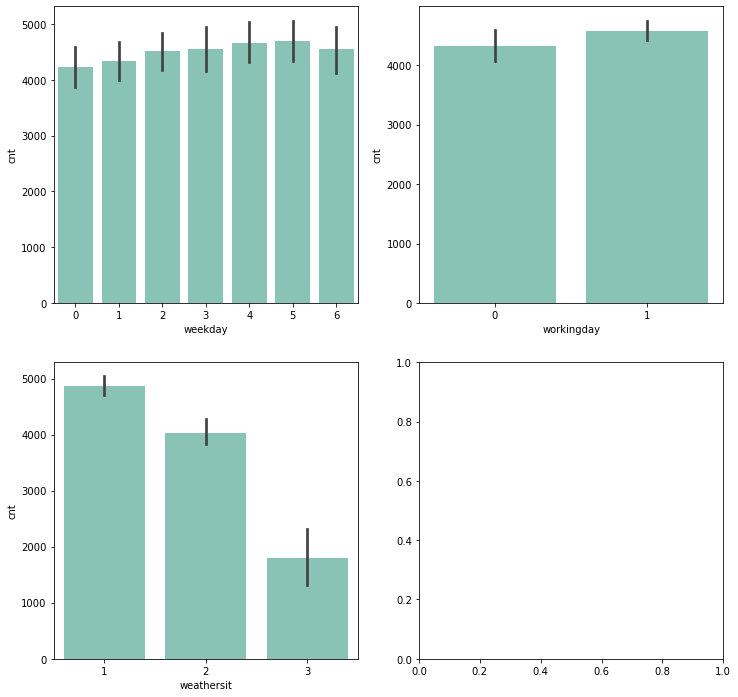

In [26]:
count_plot(['weekday','workingday','weathersit','cnt'],2,2,12,12,df,'cnt')

# Conclusion from the plot above is:

1.That number of bike rent doesn't depend to the day of week, and if day is working or not
2.But depends to the weather sit:
The highest value is when the weahter site is 1: Clear, Few clouds, Partly cloudy
3.It decrease if weather is 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
4.It is lowest when weater is 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
5.It does not exist if weather is 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Text(0.5, 0.98, 'Count of bike renting according to temperature')

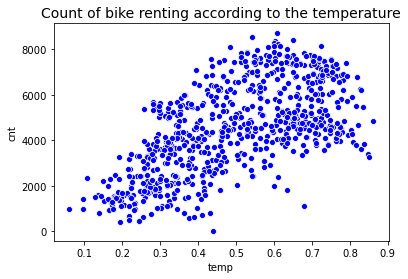

In [27]:
# fig = plt.gcf()
fig.set_size_inches(10,8)
ax = sns.scatterplot(x="temp", y="cnt", data=df, ci=False,color='Blue')
ax.set_title('Count of bike renting according to the temperature',fontdict={'fontsize':14})
fig.suptitle('Count of bike renting according to temperature')


Text(0.5, 0.98, 'Count of bike renting according to humidity')

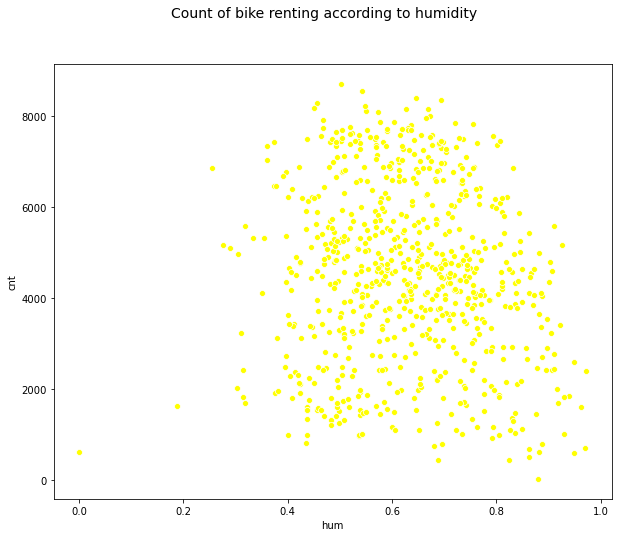

In [28]:
fig = plt.gcf()
fig.set_size_inches(10,8)
ax = sns.scatterplot(x="hum", y="cnt", data=df, ci=False,color="Yellow")
fig.suptitle('Count of bike renting according to humidity', fontsize=14)

Text(0.5, 0.98, 'Count of bike renting according to windspid')

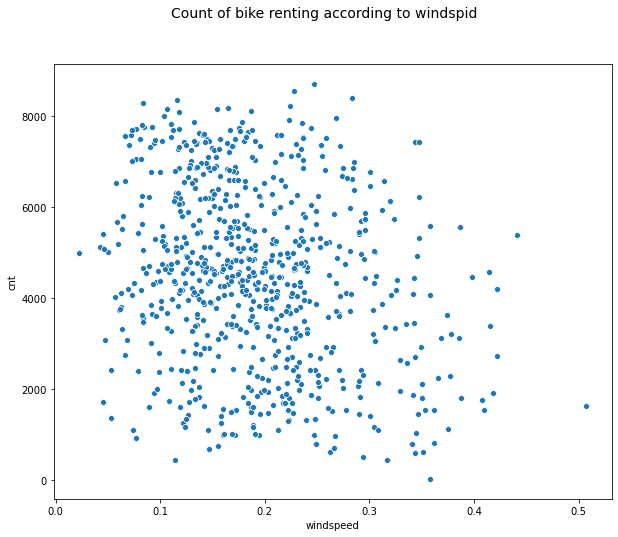

In [29]:
fig = plt.gcf()
fig.set_size_inches(10,8)
ax = sns.scatterplot(x='windspeed', y="cnt", data=df, ci=False,palette="BuGn_r")
fig.suptitle('Count of bike renting according to windspid', fontsize=14)

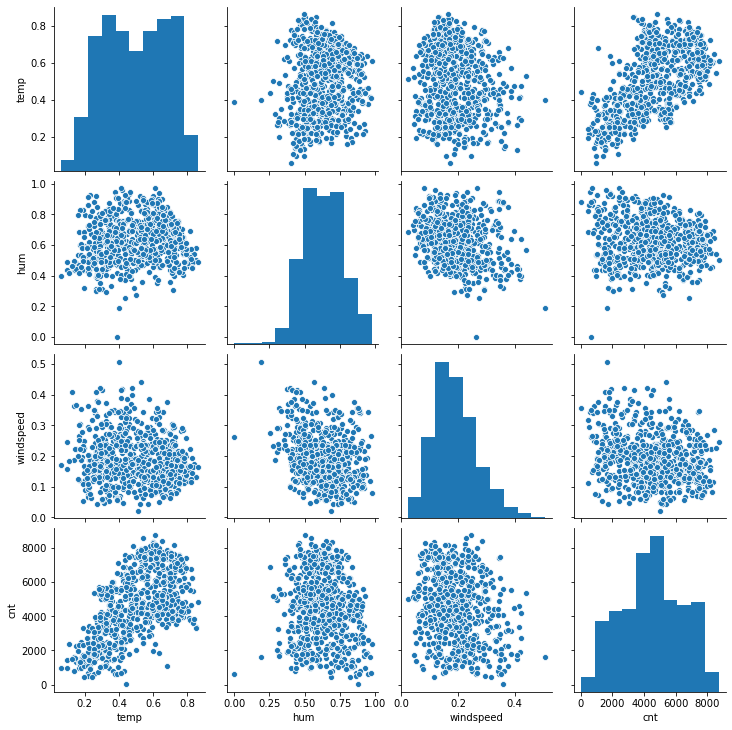

In [30]:
sns.pairplot(df[['temp','hum','windspeed','cnt']])
plt.show()

# 3.Preprocesing data set

In [31]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [32]:
#function drop_feature takes dataset and list of feature that should be dropped 

def drop_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling

#We have to prepare dataset for onehot encodine,wich means that all feature should be dorped exept features
# for onehoteencodin
# since, we have categorical feature but in binar values(yr,holiday,workingday),thay will be also removed

numerical=['temp','hum','windspeed','cnt','yr','holiday','workingday']

In [33]:
drop_feature(df,numerical)

,season,mnth,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1
...,...,...,...,...
726,1,12,4,2
727,1,12,5,2
728,1,12,6,2
729,1,12,0,1


In [34]:
# when numericall features have been removed,
# we can call function(one_hot_encoder) that takes list of feature and dataset
# and brings back new dataset with transformed value

def one_hot_encoder(list_feature_name,df):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(df)
    df_enc = pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.get_feature_names())
    return df_enc

In [35]:
#first we make list of feature we want to tranform
list_name=['season','mnth','weekday','weathersit']

#call function to make onehotencode transofromation for the feature in the list
df1_enc=one_hot_encoder(list_name,drop_feature(df,numerical))

In [36]:
# print last five row of tranformed feature
df1_enc.tail()

,x0_1,x0_2,x0_3,x0_4,x1_1,x1_2,x1_3,x1_4,x1_5,x1_6,...,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x3_1,x3_2,x3_3
726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# Let's change columns names, to have more intuitive name in new dataset

df_hot=df1_enc.rename(columns={'x0_1':'spring','x0_2':'summer','x0_3':'fall','x0_4':'winter','x1_1':'Jan','x1_2':'Feb','x1_3':'Mar','x1_4':'Apr','x1_5':'May','x1_6':'Jun','x1_7':"Jul",'x1_8':'Avg','x1_9':'Sep','x1_10':'Oct','x1_11':'Nov','x1_12':'Dec',
'x3_1':'Mist', 'x3_2':'Light Snow', 'x3_3':'Heavy Rain','x2_0':'Sunday','x2_1':'Monday', 'x2_2':'Tuseday', 'x2_3':'Wednesday', 'x2_4':'Tursday', 'x2_5':'Fryday', 'x2_6':'Saturday'})

In [38]:
# Concatenation of data_set with new df_frame, after one_hote_encoder
# if we have more feature to encode in list functon put all new datasets devided by coma

df_transform = pd.concat([df,df_hot], axis=1)
df_transform.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sunday,Monday,Tuseday,Wednesday,Tursday,Fryday,Saturday,Mist,Light Snow,Heavy Rain
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# function to drop categorical feature that we transformed in onehoteencoder
#it takes dataset and featurelist and brings back dataset prepared to be modeled
# dataset for furtur modeling  will be called df_modeling
def drop_categorical_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling

In [40]:
# finally we have dataset ready for estimation called df_modeling

df_modeling=drop_categorical_feature(df_transform,['season','mnth','weekday','weathersit'])
df_modeling

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,fall,...,Sunday,Monday,Tuseday,Wednesday,Tursday,Fryday,Saturday,Mist,Light Snow,Heavy Rain
0,0,0,0,0.344167,0.805833,0.160446,985,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,0,0.363478,0.696087,0.248539,801,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,0.196364,0.437273,0.248309,1349,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,0.200000,0.590435,0.160296,1562,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,1,0.226957,0.436957,0.186900,1600,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.652917,0.350133,2114,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
727,1,0,1,0.253333,0.590000,0.155471,3095,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
728,1,0,0,0.253333,0.752917,0.124383,1341,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
729,1,0,0,0.255833,0.483333,0.350754,1796,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 4.Building model

In [41]:
# funciton split_data_set takes dataset, depandant feature and desired test size, and brigns back:
# training set, testing set, y_train, and y_test

def split_data_set(data,dependant_feature,test_size):
    from sklearn.model_selection import train_test_split
    y=data[dependant_feature]
    X=data.drop([dependant_feature],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=0)
    df_norm = pd.DataFrame(data = X_train, columns =X_train.columns)
    return X_train,X_test,y_train,y_test,df_norm

In [42]:
X_train,X_test,y_train,y_test,df_norm=split_data_set(df_modeling,"cnt",0.15)
X_train


,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,winter,...,Sunday,Monday,Tuseday,Wednesday,Tursday,Fryday,Saturday,Mist,Light Snow,Heavy Rain
113,0,0,0,0.581667,0.810833,0.192175,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
236,0,0,1,0.684167,0.771667,0.210833,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
251,0,0,1,0.650000,0.897917,0.124379,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49,0,0,0,0.399167,0.187917,0.507463,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
406,1,0,0,0.224167,0.731250,0.289796,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,0,0,0.381667,0.911250,0.101379,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
192,0,0,1,0.794167,0.559167,0.200254,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
629,1,0,1,0.599167,0.668750,0.154229,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
559,1,0,1,0.731667,0.485833,0.080850,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
# we can see that fuction obove devided dataset in set X_train with 621 row, and X_test with 110
# we use training set to train model, and testing set to estimate results of made model

print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

X_train shape:(621, 32)
 y_train shape:(621,)
 X_test shape:(110, 32)
 y_test shape:(110,)


In [44]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,winter,...,Sunday,Monday,Tuseday,Wednesday,Tursday,Fryday,Saturday,Mist,Light Snow,Heavy Rain
113,0,0,0,0.581667,0.810833,0.192175,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
236,0,0,1,0.684167,0.771667,0.210833,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
251,0,0,1,0.650000,0.897917,0.124379,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49,0,0,0,0.399167,0.187917,0.507463,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
406,1,0,0,0.224167,0.731250,0.289796,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,0,0,0.381667,0.911250,0.101379,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
192,0,0,1,0.794167,0.559167,0.200254,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
629,1,0,1,0.599167,0.668750,0.154229,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
559,1,0,1,0.731667,0.485833,0.080850,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Now,when train in test set have been prepered,let's see how  results we will be measured?

In scikit-learn documentation we can find Regression metrics:

The sklearn.metrics module implements several loss, score, and utility functions to measure regression performance. 
Next metrics will be used: 

1.mean_absolute_error
(The mean_absolute_error function computes mean absolute error,
 a risk metric corresponding to the expected value of the absolute error loss or -norm loss),

2.mean_squared_error
(The mean_squared_error function computes mean square error, 
 a risk metric corresponding to the expected value of the squared (quadratic) error or loss),  

3.r2_score
(It represents the proportion of variance (of y) that has been explained by the independent variables in the model. 
 It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be 
 predicted by the model, through the proportion of explained variance.


In [45]:
# import mean absolute and squared error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}
list_model=[]
list_name=[]

# Import models that will be applied on dataset

#1.model Lasso
from sklearn.linear_model import Lasso
lin_reg=Lasso ()
model=lin_reg
list_model.append(model)

#2.model SVC kernel linear
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR (kernel='linear', C=1)
model=svr_linear
list_model.append(model)

#3.model SVR_rbf
SVR_rbf=SVR ()
model=SVR_rbf
list_model.append(model)

#4.model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model=ran_for_reg
list_model.append(model)

#5.model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model=dec_tree_reg
list_model.append(model)

#6.model ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
model=extra_tree
list_model.append(model)

#7.model BaggingRegressor
from sklearn.ensemble import BaggingRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_tree = BaggingRegressor(extra_tree, random_state=0)
model=bag_tree
list_model.append(model)

#8.model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
n_neighbor=KNeighborsRegressor()
model=n_neighbor
list_model.append(model)
#9.model Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
model=ridge
list_model.append(model)

#10.model XGboost
import xgboost as xgb
xgb=xgb.XGBRegressor()
model=xgb
list_model.append(model)



In [46]:
#fuction model_func takes arguments( model,X_train,y_train,X_test,y_test)
# first  model is fitted with X_train,X_test
#next, prediction is made by model
#third errors are calculated,and appended in appropiate dict

def model_func(model,X_train,y_train,X_test,y_test):
    model=model
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    MAE=mean_absolute_error(y_test,y_pred)
    MSE=mean_squared_error(y_test,y_pred)
    mean_sq_err_std[model]=MSE
    mean_abs_err_std[model]=MAE
    return(model,MAE,MSE,y_pred)


In [47]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,winter,...,Sunday,Monday,Tuseday,Wednesday,Tursday,Fryday,Saturday,Mist,Light Snow,Heavy Rain
113,0,0,0,0.581667,0.810833,0.192175,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
236,0,0,1,0.684167,0.771667,0.210833,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
251,0,0,1,0.650000,0.897917,0.124379,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49,0,0,0,0.399167,0.187917,0.507463,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
406,1,0,0,0.224167,0.731250,0.289796,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,0,0,0.381667,0.911250,0.101379,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
192,0,0,1,0.794167,0.559167,0.200254,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
629,1,0,1,0.599167,0.668750,0.154229,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
559,1,0,1,0.731667,0.485833,0.080850,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
# Hir is one more function to make unique list model
def unique_list_model(list_model):
    model_unique=[]
    for model in list_model:
        if model not in model_unique:
            model_unique.append(model)
    return(model_unique)

In [49]:
# we call function unique_list_model
list_mod=unique_list_model(list_model)
list_name=[str(name)[:10] for name in list_mod]
list_name

['Lasso()',
 'SVR(C=1, k',
 'SVR()',
 'RandomFore',
 'DecisionTr',
 'ExtraTreeR',
 'BaggingReg',
 'KNeighbors',
 'Ridge()',
 'XGBRegress']

In [50]:
# Now, when list of unique models has been finised,
# we can call function to apply all models in list on dataset

for mod in list_mod:
    model_n,MAE,MSE,y_pred=model_func(mod,X_train,y_train,X_test,y_test) 



# Result of above code is:
1.prediction of all models
2.dictionary of MAE
3.dictionary of MSE
4.unique list of all models


In [51]:
#we will make dataframe of model_name and errors 
df_E1=pd.DataFrame({'models':range(len(list_mod)),'model_name':list_name,'MAE':list(mean_abs_err_std.values()),"MSE":list(mean_sq_err_std.values())})
df_E1


,models,model_name,MAE,MSE
0,0,Lasso(),599.438776,6.623121e+05
1,1,"SVR(C=1, k",1716.119444,4.102291e+06
2,2,SVR(),1813.042460,4.585887e+06
3,3,RandomFore,501.471818,4.660824e+05
4,4,DecisionTr,645.918182,8.915203e+05
5,5,ExtraTreeR,732.027273,1.075957e+06
6,6,BaggingReg,503.075455,4.861244e+05
7,7,KNeighbors,1068.932727,1.673604e+06
8,8,Ridge(),585.796169,6.336512e+05
9,9,XGBRegress,576.004739,6.368285e+05


In [52]:
# when we have result of all errors,we have to choose model with best result and go on,
# with furter estimation 

#first we make list of mean squared error 
list_value_MSE=list(mean_sq_err_std.values())

#second we take minimum value from all data in list
Min_MSE=min(list(mean_sq_err_std.values()))

#we take model name  with minimum  error value
df_model=df_E1.loc[df_E1["MSE"]==Min_MSE]
y=str(df_model['model_name'])
# let'print model name
print(f"Minimum of MEAN SQUERED ERROR is for model{y[:30]} ..., and value of MSE is {Min_MSE}")

Minimum of MEAN SQUERED ERROR is for model3    RandomFore
Name: model_na ..., and value of MSE is 466082.4259545455


# Let's visualise results of MSE,and MAE

Text(0.5, 0.98, 'Diagram of Mean SQUERED ERROR according to the model')

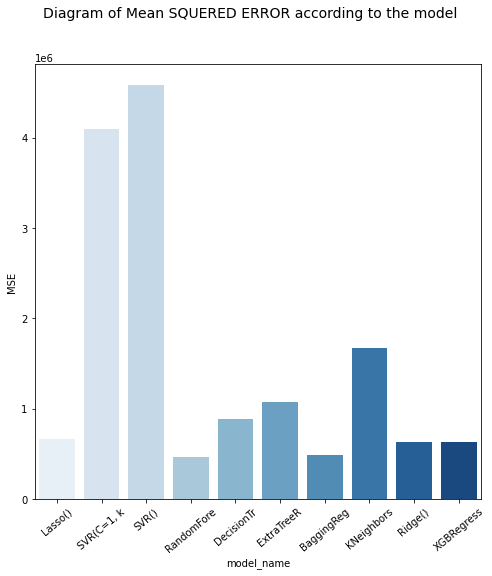

In [53]:
df_ERROR=df_E1.drop(['model_name'],axis=1)
fig = plt.gcf()
fig.set_size_inches(8,8)
ax =sns.barplot(x=df_E1["model_name"],y="MSE",palette="Blues",data=df_E1,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
fig.suptitle('Diagram of Mean SQUERED ERROR according to the model', fontsize=14)

In [54]:
#Reslut of estimation of Mean apsolute error
list_value_MAE=list(mean_abs_err_std.values())
Min_MAE=min(list(mean_abs_err_std.values()))
df_model_best=df_E1.loc[df_E1["MAE"]==Min_MAE]
y=str(df_model_best['model_name'])
print()
print(f"Minimum of MEAN APSOLUT ERROR is for model {y[:30]},and value of MAE is {Min_MAE}")
print()


Minimum of MEAN APSOLUT ERROR is for model 3    RandomFore
Name: model_na,and value of MAE is 501.4718181818182




Best resulst gives model: 3    RandomFore
Name: model_name, dtype: object



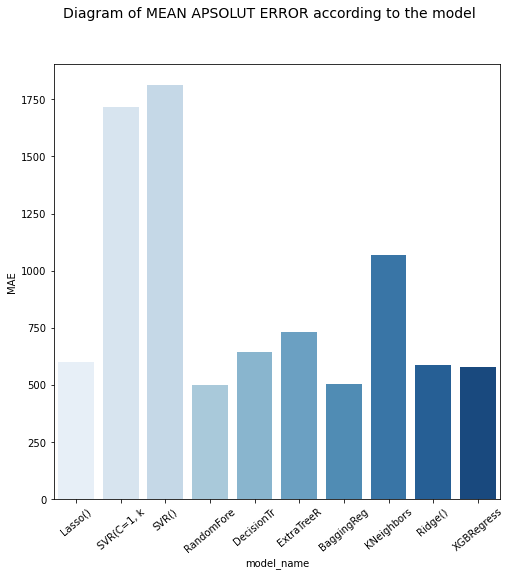

In [55]:
fig = plt.gcf()
fig.set_size_inches(8,8)
ax =sns.barplot(x=df_E1["model_name"],y="MAE",palette="Blues",data=df_E1,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
fig.suptitle('Diagram of MEAN APSOLUT ERROR according to the model', fontsize=14)
print()
print('Best resulst gives model:',df_model_best['model_name'])
print()

# Conclusion: Model Random Forest Regressor gives the best result
             

In [56]:
#we import model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

#apply model on dataset
model_func(rf_reg,X_train,y_train,X_test,y_test)

#take result of prediction(MAE,MSE,y_pred)
model_n,MAE,MSE,y_pred=model_func(rf_reg,X_train,y_train,X_test,y_test)


In [57]:
# Let's take a look on values of predected feature('cnt'),and propriate dependant feature.
y_pred
ypred=list(y_pred)
y_test_list=y_test.tolist()

In [58]:
#Data frame presents values of y_pred,y_test,and loss(difference between predicted and target value)
df_perdict=pd.DataFrame({'y_pred':list(y_pred),'y_test':y_test_list})
df_perdict['loss']=df_perdict['y_pred']-df_perdict['y_test']
df_perdict

,y_pred,y_test,loss
0,5031.48,5923,-891.52
1,4529.69,4592,-62.31
2,1287.89,1248,39.89
3,1142.24,1360,-217.76
4,3242.89,4075,-832.11
...,...,...,...
105,4411.77,4302,109.77
106,7430.25,7693,-262.75
107,7404.22,7415,-10.78
108,5172.72,6041,-868.28


In [59]:
#Errors with normalize values
from sklearn import metrics
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
MSE_norm = mean_squared_error(df_perdict['y_pred'],df_perdict['y_test'])
RMSE_norm=np.sqrt(metrics.mean_squared_error(df_perdict['y_pred'], df_perdict['y_test']))
MAE_norm=mean_absolute_error(df_perdict['y_pred'],df_perdict['y_test'])
r2_norm=r2_score(df_perdict['y_pred'], df_perdict['y_test'])
df_err_norm=pd.DataFrame({'MSE':[MSE_norm],'MAE':[MAE_norm],'RMSE':[RMSE_norm],'R2_norm':[r2_norm],"model":["RandomForestRegression"]})
df_err_norm.set_index("model")

,MSE,MAE,RMSE,R2_norm
model,,,,
RandomForestRegression,462118.332975,498.625455,679.79286,0.871907


#                                 Metrics of RandomForestRegression Model

In [60]:
df_errors=pd.DataFrame({'MSE':[MSE],'MAE':[MAE],'RMSE':[RMSE_norm],'R2':[r2_norm],'model':["RandomForestRegression"]})
df_errors.set_index("model")

,MSE,MAE,RMSE,R2
model,,,,
RandomForestRegression,462118.332975,498.625455,679.79286,0.871907


# Plot results of prediction for first 30 row of test data

<Figure size 432x288 with 0 Axes>

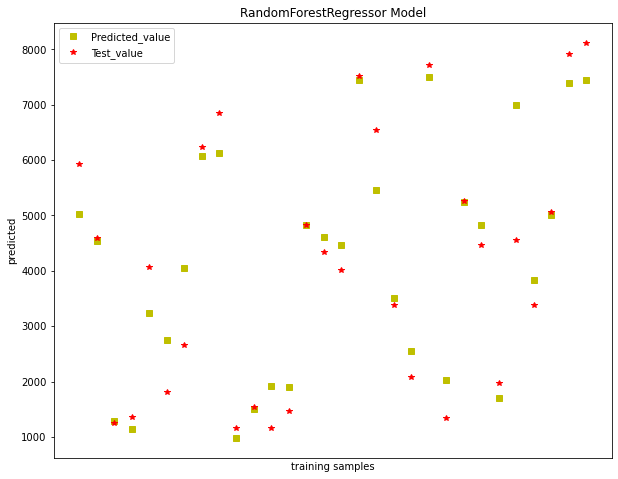

In [61]:
plt.figure()
plt.figure(figsize=(10,8))
plt.plot(df_perdict['y_pred'][:30], 'ys', label='Predicted_value')
plt.plot(df_perdict['y_test'][:30], 'r*', label='Test_value')
plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('RandomForestRegressor Model')
plt.show()

# Decision Tree Visualisation (exemple of tree with max_dept=3)

In [62]:
#plot of 0 desision tree

In [63]:
#for need of visualsiation i put max_depth,that graph can give us some sence of spliting and making estimation
rf_reg1=RandomForestRegressor(max_depth=3)
rf_reg1.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

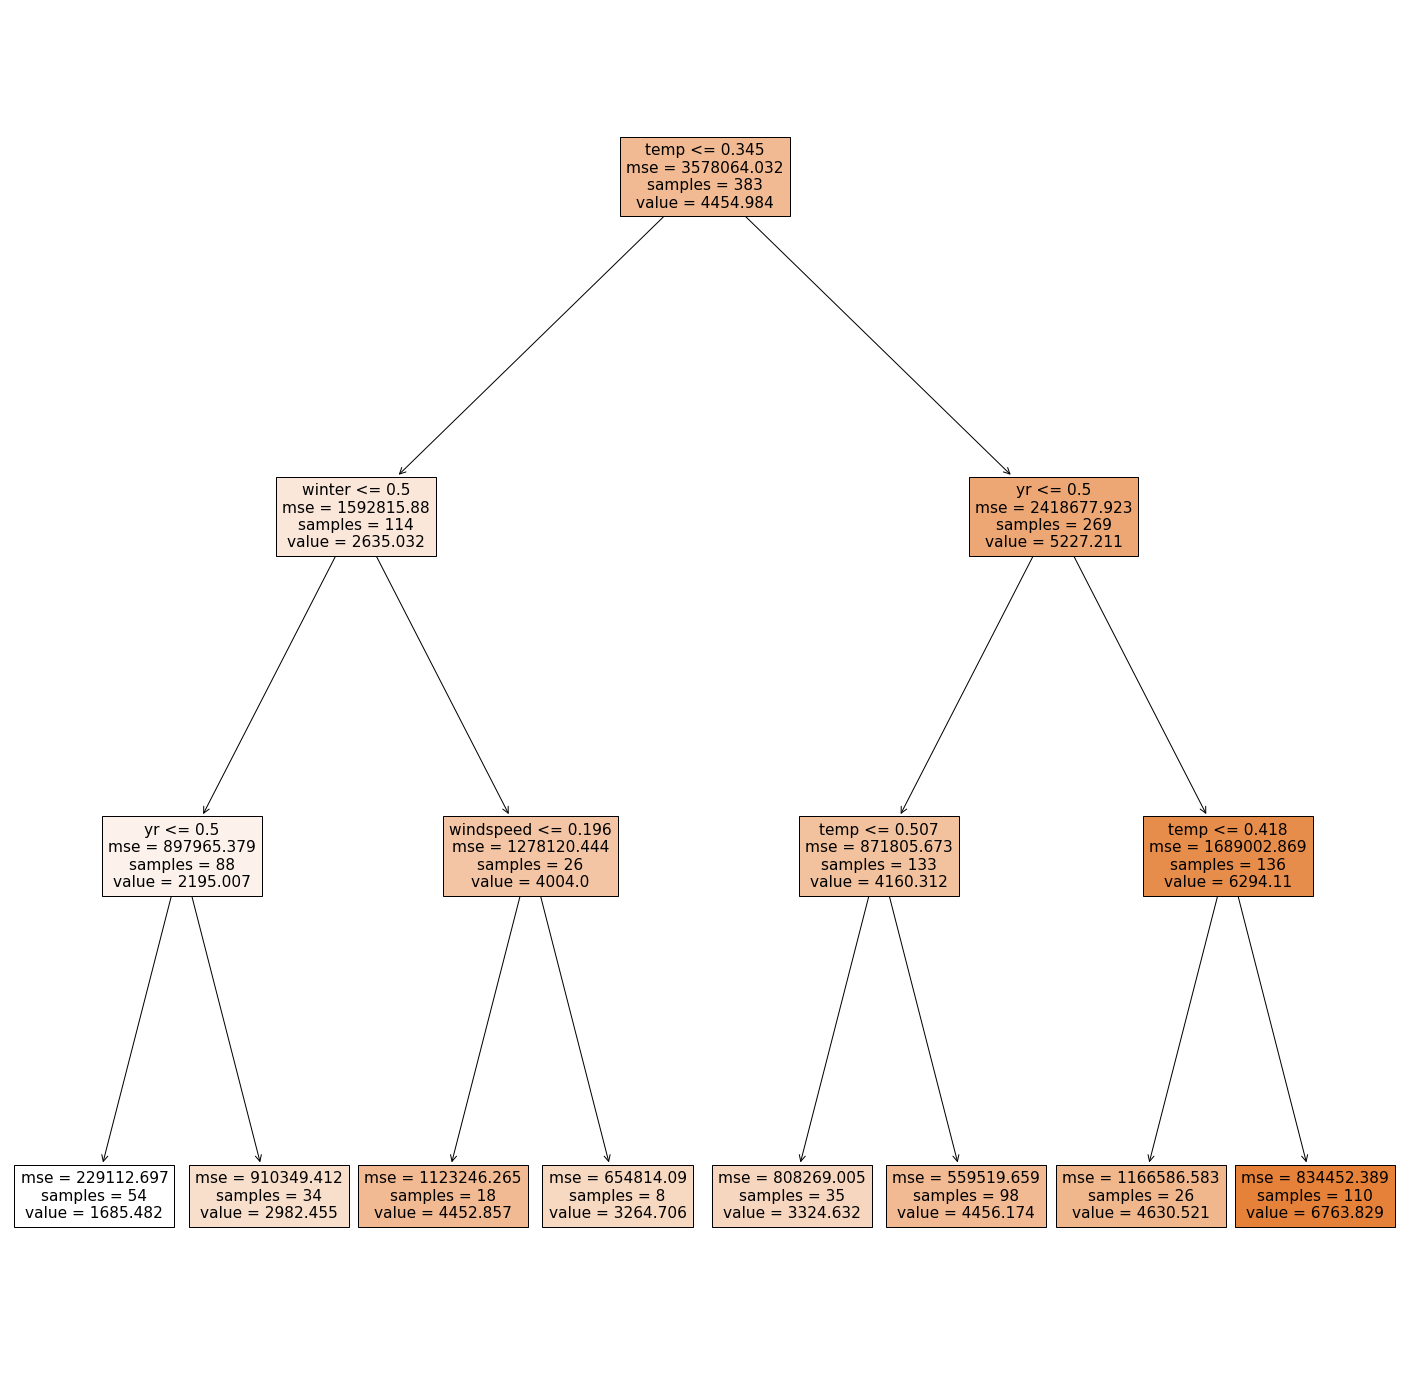

In [64]:
from sklearn import tree
fig = plt.gcf()
fig.set_size_inches(25,25)

_ = tree.plot_tree(rf_reg1.estimators_[0], feature_names=X_train.columns, filled=True)

# 5.Estimating and analyze all parametar 

In [65]:
# Look at parameters used by our current forest and note for sklear documentation there meaning
print('Parameters currently in use:\n')
print(rf_reg.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


hypoparametars:
bootstrap bool, default=True.Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”.The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=n_features.
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

max_leaf_nodesint, default=None
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

'min_impurity_decrease': 0.0,min_impurity_splitfloat, default=None
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

'min_impurity_split': None , default=None
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

'min_samples_leaf':,int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

'min_samples_split': min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

'min_weight_fraction_leaf': 0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

n_estimatorsint, default=100
The number of trees in the forest.

n_jobsint, default=None
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.oob_scorebool, default=False
whether to use out-of-bag samples to estimate the R^2 on unseen data.oob_scorebool, default=False

random_stateint or RandomState, default=None
Controls both the randobmness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). 

# Random Hyperparameter Grid

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [68]:
print(rf_random.get_params)


<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', ve

In [69]:
#WE HAVE THE BEST Hyperparameter
rf_random.best_params_

{'n_estimators': 890,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [70]:
# Let's model with best hypoparametars

from sklearn.ensemble import RandomForestRegressor
#model with best parametars
rf_reg1= RandomForestRegressor(n_estimators=890,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth=60,
 bootstrap=True)

#call function to fit model with new parametar
model_func(rf_reg,X_train,y_train,X_test,y_test)
model_n,MAE_best,MSE_best,y_pred_best=model_func(rf_reg1,X_train,y_train,X_test,y_test)
#rf_reg1.get_best_param

In [71]:
print("MAE with best hypoparameters:",MAE_best)
print("MSE with best hypoparameters:",MSE_best)
print("MAE with default hypoparameters:",MAE)
print("MSE with default hypoparameters:",MSE)
print()
r2_best=r2_score(y_test,y_pred_best)
print(f'R2 Score:{r2_best}')
print()
print("Let's see imporvement of model with best hypoparametar")
print()
print("Improvement of MAE:",(MAE_best-MAE_norm))
print("Improvement of MSE:",(MSE_best-MSE_norm))

MAE with best hypoparameters: 492.55334014300297
MSE with best hypoparameters: 457332.3025036095
MAE with default hypoparameters: 498.62545454545455
MSE with default hypoparameters: 462118.3329745455

R2 Score:0.9015014492002746

Let's see imporvement of model with best hypoparametar

Improvement of MAE: -6.072114402451575
Improvement of MSE: -4786.030470935977


We have small imporvment of model

# Grid Search with Cross Validation

In [72]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60,70,80,90],
    'max_features': [5,6,7,8,'auto'],
    'min_samples_leaf': [2, 4, 6],
    'n_estimators': [400, 600, 800,900,1000,1300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [73]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 17.2min finished


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 8,
 'min_samples_leaf': 2,
 'n_estimators': 800}

In [74]:
#Estimate model with hypoparametars,after grid search 

from sklearn.ensemble import RandomForestRegressor
rf_reg2 = RandomForestRegressor(n_estimators=400,
 min_samples_split=2,
 min_samples_leaf=2,
 max_features=8,
 max_depth=90,
 bootstrap=True)
model_func(rf_reg,X_train,y_train,X_test,y_test)

model_n,MAE_grid,MSE_grid,y_pred_grid=model_func(rf_reg,X_train,y_train,X_test,y_test)
r2_grid=r2_score(y_pred_grid,y_test)
RMSE_grid=np.sqrt(MSE_grid)

In [75]:
df_error_imp=pd.DataFrame({'MSE':[MSE_grid],'MAE':[MAE_grid],'RMSE':[RMSE_grid],'R2':[r2_grid],'model':["RandomForestRegression"]})
df_error_imp.set_index("model")

,MSE,MAE,RMSE,R2
model,,,,
RandomForestRegression,448949.437815,490.989545,670.036893,0.877495


# Feature importance

In [76]:
# Finaly, let's  see all feature once more

In [77]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model and fit the model
model=RandomForestRegressor(n_estimators=890,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=60,bootstrap=True)

model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
#fm,fiv=feature_importance(mod=model,importance=importance)
print(importance)

# dataframe of feature importance
df_feature_importance=pd.DataFrame({'Feature:':X_train.columns,'Importance_value:':importance})
df_sorted=df_feature_importance.sort_values(by=['Importance_value:'],ascending=[False])
df_sorted

[2.93790949e-01 3.46907898e-03 3.81316874e-03 4.68488542e-01
 6.48800713e-02 3.58534699e-02 3.37163470e-02 2.34954666e-03
 7.52930619e-04 3.76945527e-02 1.42887047e-03 9.71210299e-04
 2.11200296e-03 3.29507128e-03 1.10634736e-03 1.19058487e-03
 4.78292721e-04 7.42603852e-04 2.50132132e-03 4.63477912e-03
 4.59830673e-04 1.55523964e-03 3.86839617e-03 1.96862849e-03
 1.73514044e-03 1.68696132e-03 1.85633819e-03 1.63876506e-03
 3.79003919e-03 4.05129296e-03 2.58536867e-03 1.15342584e-02]


,Feature:,Importance_value:
3,temp,0.468489
0,yr,0.293791
4,hum,0.064880
9,winter,0.037695
5,windspeed,0.035853
6,spring,0.033716
31,Heavy Rain,0.011534
19,Oct,0.004635
29,Mist,0.004051
22,Sunday,0.003868


# Visualize feature importance 

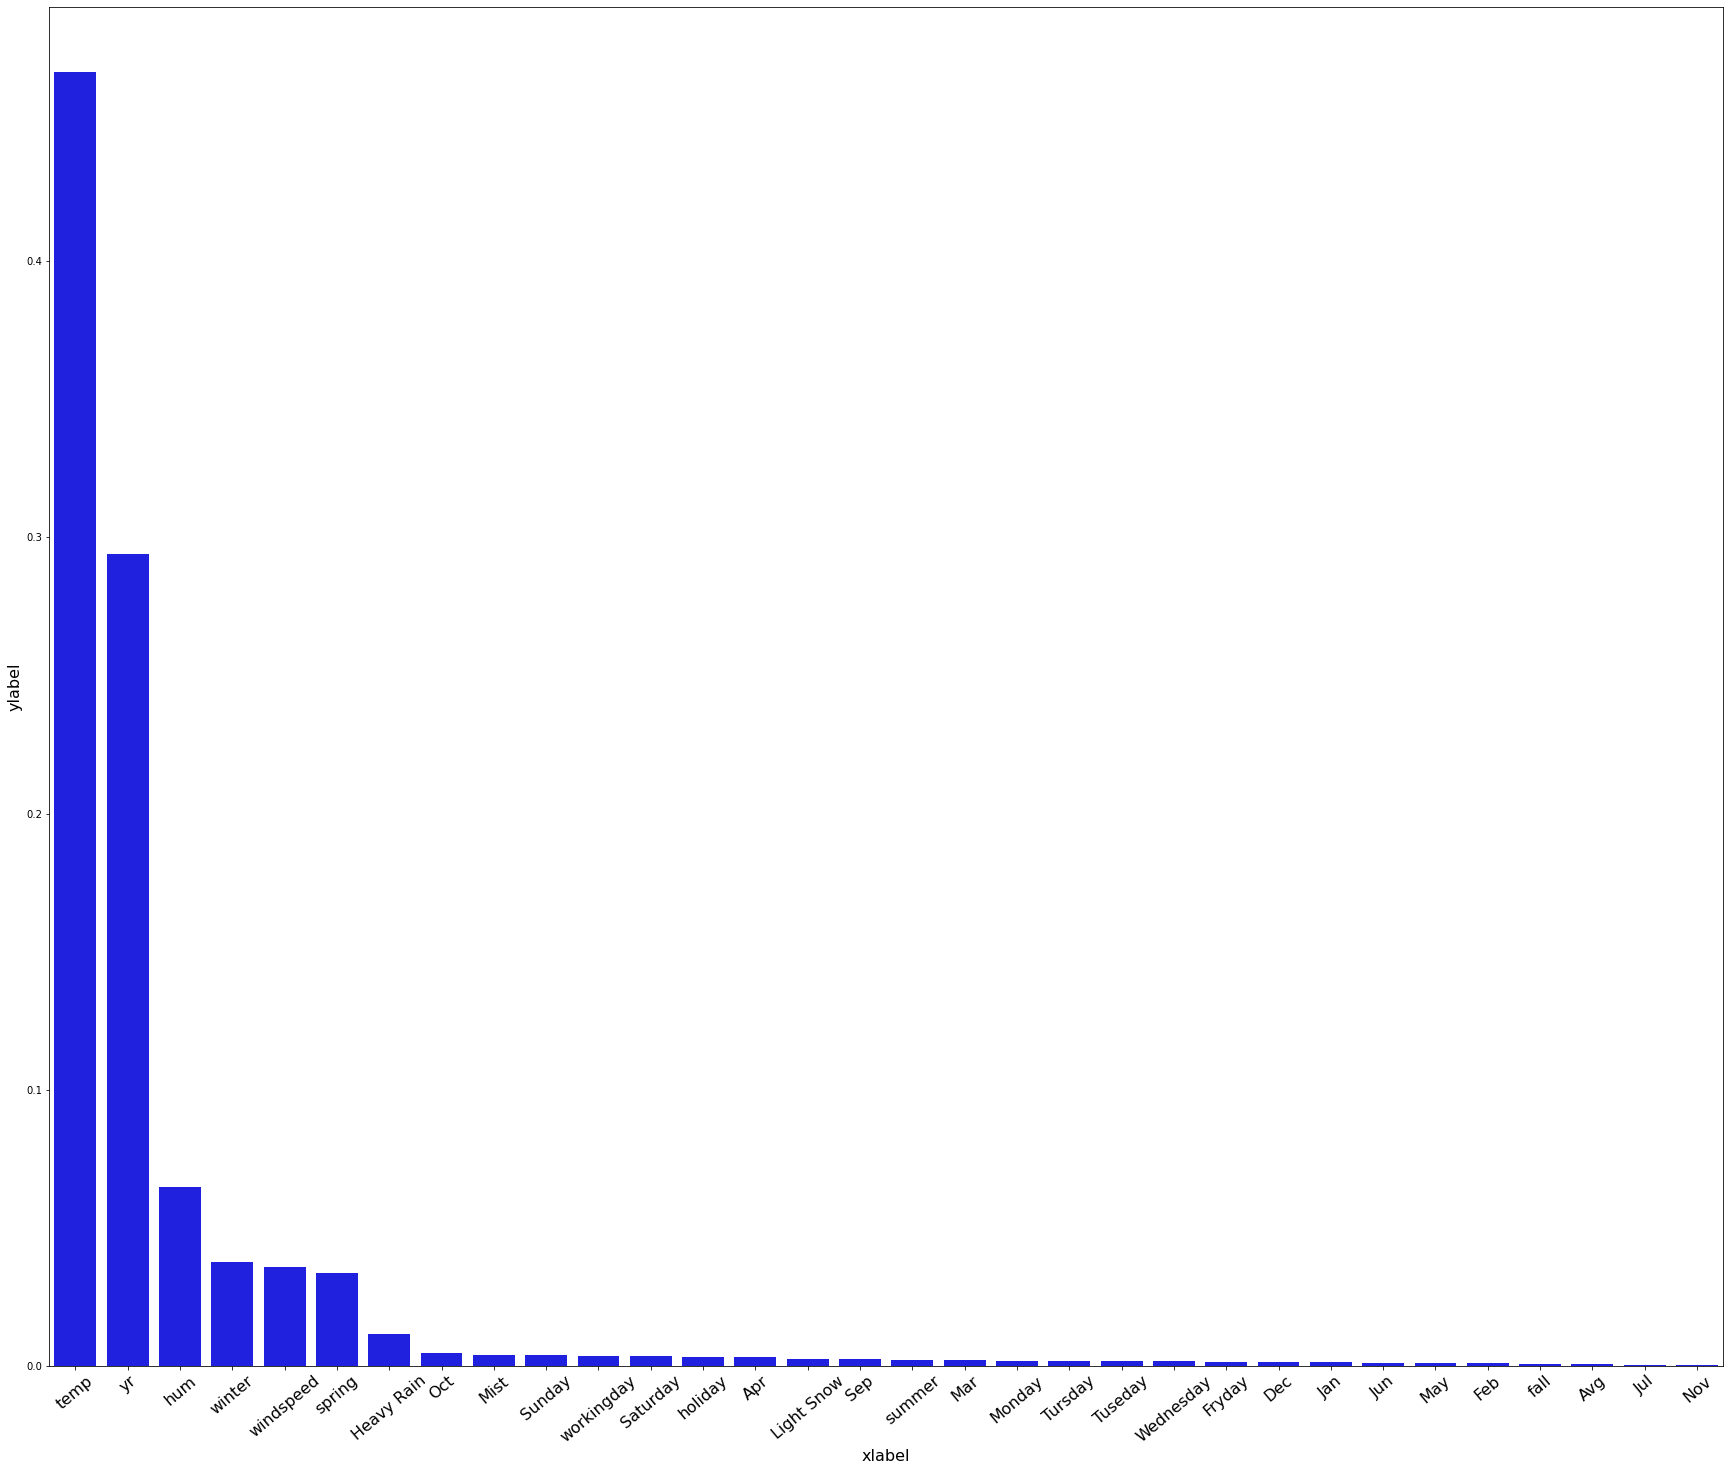

In [78]:
fig = plt.gcf()
fig.set_size_inches(30,25)
ax=sns.barplot(x=df_sorted['Feature:'],y=df_sorted['Importance_value:'],color='Blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,fontsize=16)
plt.xlabel('xlabel', fontsize=16)
plt.ylabel('ylabel', fontsize=16)
pyplot.show()

In [79]:
#Now, wi will make code to apply model with best parametar on dataset,but with dropped feautre one by one
y=df_modeling['cnt']
X=df_modeling.drop(['cnt'],axis=1)
errs = {}
errs_r2={}
from sklearn.model_selection import train_test_split
for col in X.columns:
    X_new = X.drop(col, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size=0.15,random_state=0)
    # Select ML model
    model = RandomForestRegressor(n_estimators=890, min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=60,bootstrap=True)
    # Train a model
    model.fit(X_train, y_train)
    # Evaluate model on test data
    pred = model.predict(X_test)  # Best model is used by default
    errs[col] = mean_absolute_error(y_test, pred)
    errs_r2[col]=r2_score(y_test,y_pred)


In [80]:
df_aps_err=pd.DataFrame({'Feature dropped':list(errs.keys()),'MAE':list(errs.values())})
# df_aps_err=pd.DataFrame({'Feature dropped':list(errs.keys()),'MAE':list(errs.values())})
df_aps_err

#when we have result of all errors,we can  choose model with best result 
#first we make list of mean squared error 
lista_value_MSE=list(errs.values())

#second we take minimum value from all data in list
Min_MAE_feat=min(list(errs.values()))
print(Min_MAE_feat)
df_feat=df_aps_err.loc[df_aps_err['MAE']==Min_MAE_feat]
df_feat



491.6413993871297


,Feature dropped,MAE
20,Nov,491.641399


In [81]:
df_aps_err

,Feature dropped,MAE
0,yr,1227.154188
1,holiday,495.211359
2,workingday,498.423228
3,temp,592.451982
4,hum,530.490010
5,windspeed,514.717375
6,spring,508.940306
7,summer,494.980266
8,fall,496.395853
9,winter,498.457160


# Model with best parametars and featurs combination


In [82]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'fall', 'winter', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Avg', 'Sep', 'Oct', 'Nov', 'Dec', 'Sunday', 'Monday', 'Tuseday',
       'Wednesday', 'Tursday', 'Fryday', 'Saturday', 'Mist', 'Light Snow'],
      dtype='object')

In [83]:
X_train.drop(['holiday','workingday', 'hum', 'summer','fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Avg', 'Sep', 'Oct', 'Nov', 'Dec', 'Sunday', 'Monday', 'Tuseday',
       'Wednesday', 'Tursday', 'Fryday', 'Saturday', 'Mist', 'Light Snow'],axis=1,inplace=True)
X_test.drop(['holiday','workingday', 'hum', 'summer','fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Avg', 'Sep', 'Oct', 'Nov', 'Dec', 'Sunday', 'Monday', 'Tuseday','Wednesday', 'Tursday', 'Fryday', 'Saturday', 'Mist', 'Light Snow'],axis=1,inplace=True)

In [84]:
X_train
X_test

,yr,temp,windspeed,spring,winter
196,0,0.686667,0.208342,0.0,0.0
187,0,0.750000,0.159200,0.0,0.0
14,0,0.233333,0.157963,1.0,0.0
31,0,0.192174,0.053213,1.0,0.0
390,1,0.341667,0.073396,1.0,0.0
...,...,...,...,...,...
211,0,0.805833,0.164813,0.0,0.0
662,1,0.587500,0.072779,0.0,1.0
636,1,0.619167,0.164179,0.0,1.0
456,1,0.425833,0.172267,0.0,0.0


In [85]:
#Estimate model with hypoparametars,after grid search 

from sklearn.ensemble import RandomForestRegressor
rf_reg3 = RandomForestRegressor(n_estimators=890, min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=60,bootstrap=True)
model=rf_reg3
model.fit(X_train,y_train)
y_pred_feat=model.predict(X_test)
MAE_feature=mean_absolute_error(y_test,y_pred_feat)
MSE_feature=mean_squared_error(y_test,y_pred_feat)


In [86]:
print("MAE with most important feature:",MAE_feature)
print()
print("MSE with most important feature:",MSE_feature)
print()
print("Improvement of MAE:",(MAE_feature-MAE_norm))
print()
print("Improvement of MSE:",(MSE_feature-MSE_norm))
print()
r2=r2_score(y_test,y_pred_feat)
print()
print(f'R2 Score:{r2}')

MAE with most important feature: 753.629499489275

MSE with most important feature: 1085505.8317509037

Improvement of MAE: 255.00404494382042

Improvement of MSE: 623387.4987763583


R2 Score:0.7662077427577496


# Conclusion

# Performance of ML model with default parametar can be analyzed by model metrics for regression: 

1.MeanSqueredError   2.MeanApslolutError      3.RootMeanSquaredError     4.r2_score

In [87]:
df_err_norm.set_index("model")

,MSE,MAE,RMSE,R2_norm
model,,,,
RandomForestRegression,462118.332975,498.625455,679.79286,0.871907


Improvment of model was achive by tuning hypoparametars  with random and gridsearch validation methods.
Metrics of improved model are:

In [88]:
df_error_imp.set_index("model")

,MSE,MAE,RMSE,R2
model,,,,
RandomForestRegression,448949.437815,490.989545,670.036893,0.877495


# 2.Feature analyze showes next reslut:

# How  model can be used for  bussines  improvment purposes?